### Load MNIST dataset from PyTorch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

train_dataset = input_data.read_data_sets("./mnist/data/", one_hot=True)

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Data type conversion

In [2]:
X = np.array(train_dataset.train.images[:]).reshape(-1,28,28)
y = np.array(train_dataset.train.labels[:])

print('Data size X: ' + str(X.shape)+', y: '+str(y.shape))
num_samples, height, width = X.shape 
dim = height * width

Data size X: (55000, 28, 28), y: (55000, 10)


### Data visualization

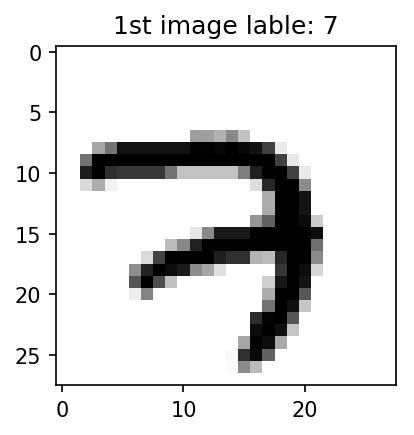

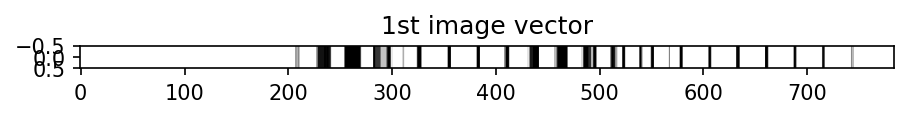

In [12]:
# Visualize MNIST data (1st digit)
fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(4,3), dpi=150)
img1=X[0,:]
axe.imshow(img1.reshape(28,28),cmap='gray_r')
axe.set_title('1st image lable: 7')
plt.show()

# Visualize MNIST data in a vector form (1st digit)
fig, axe = plt.subplots(nrows=1, ncols=1, figsize=(7,0.2), dpi=150)
axe.imshow(img1.reshape(1,-1),aspect='auto',cmap='gray_r')
axe.set_title('1st image vector')
plt.show()

### Principal Component Analysis (PCA)

In [13]:
# Step 0: Vectorize all images
X = X.reshape(-1,784)

# Step 1: Subtract the mean
X_mean=np.mean(X,axis=0).reshape(1,-1)
X0=X-X_mean

# Step 2: Compute Data Covariance by two equivalent ways
# Co1 = np.matmul(np.transpose(X0),X0) #alternative
Co1 = np.cov(np.transpose(X0))

# Step 3: Compute Eigenvalues & Eigenvectors of Covariance Matrix
U1,s1,V1=np.linalg.svd(Co1)

### Fraction of variance
$FoV(k) = \frac{\sum_i^k s_i}{\sum_i^D s_i}$<br>

(784,)


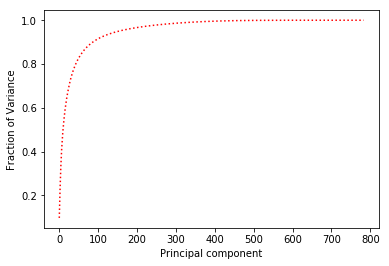

We need at least 43  principal components to capture 80% of the total variance.


In [6]:
s1=np.diag(np.diag(s1))
print(s1.shape)
#sort_s1=np.sort(sort_s1)[::-1]   :sort 불필요 (SVD연산에서 S가 큰순서부터 sorting되어 출력됨)

x1=np.arange(784)
y1=np.cumsum(s1)/np.sum(s1) #fraction of variance
plt.plot(x1,y1,'r:')
plt.xlabel('Principal component')
plt.ylabel('Fraction of Variance')
plt.show()

where = np.where(y1>0.8, x1,784)
print('We need at least' ,min(where) ,' principal components to capture 80% of the total variance.')

### Low-dimensional reconstruction

$\hat{x}_i = \overline{x} + \sum_{k=1}^K (x_i\cdot e_k) e_k$<br>
where<br>
$x_i$ is the i-th image sample,<br>
$e_k$ is the eigenvector of k-th largest eigenvalue,<br>
$\overline{x}$ is the mean of entire images,<br>
$\hat{x}_i$ is the reconstructed image from $K$ eigenvectors.

In [16]:
n=100
i=0 #choose image amoung X
X_i=np.zeros((n,784))#Reconstruction matrix with n samples
xi=X0[i,:] #xi

for d in range(n):
    T=np.zeros((784,1))
    for k in range(n):
        ek=U1[:,k]#ek
        T = T + np.dot(np.dot(xi,ek),ek).reshape(784,1)#sigma 0~k
    X_i[d,:]=X_mean.reshape(1,784) + T.reshape(1,-1)#Xi hat

## Visualize mean image

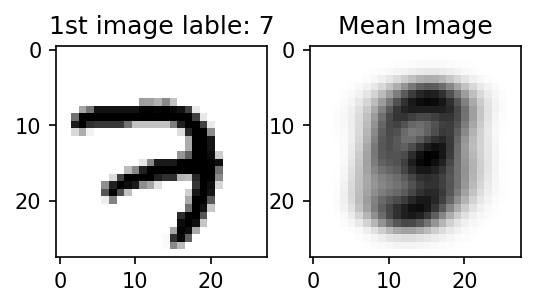

In [8]:
X=X.reshape(-1,28,28)

fig, axe = plt.subplots(nrows=1, ncols=2, figsize=(4,4), dpi=150)
axe[0].imshow(X[0,:],cmap='gray_r')
axe[0].set_title('1st image lable: 7')
axe[1].imshow(X_mean.reshape(28,28),cmap='gray_r')
axe[1].set_title('Mean Image')
plt.show()

### Visualize the reconstruction of image

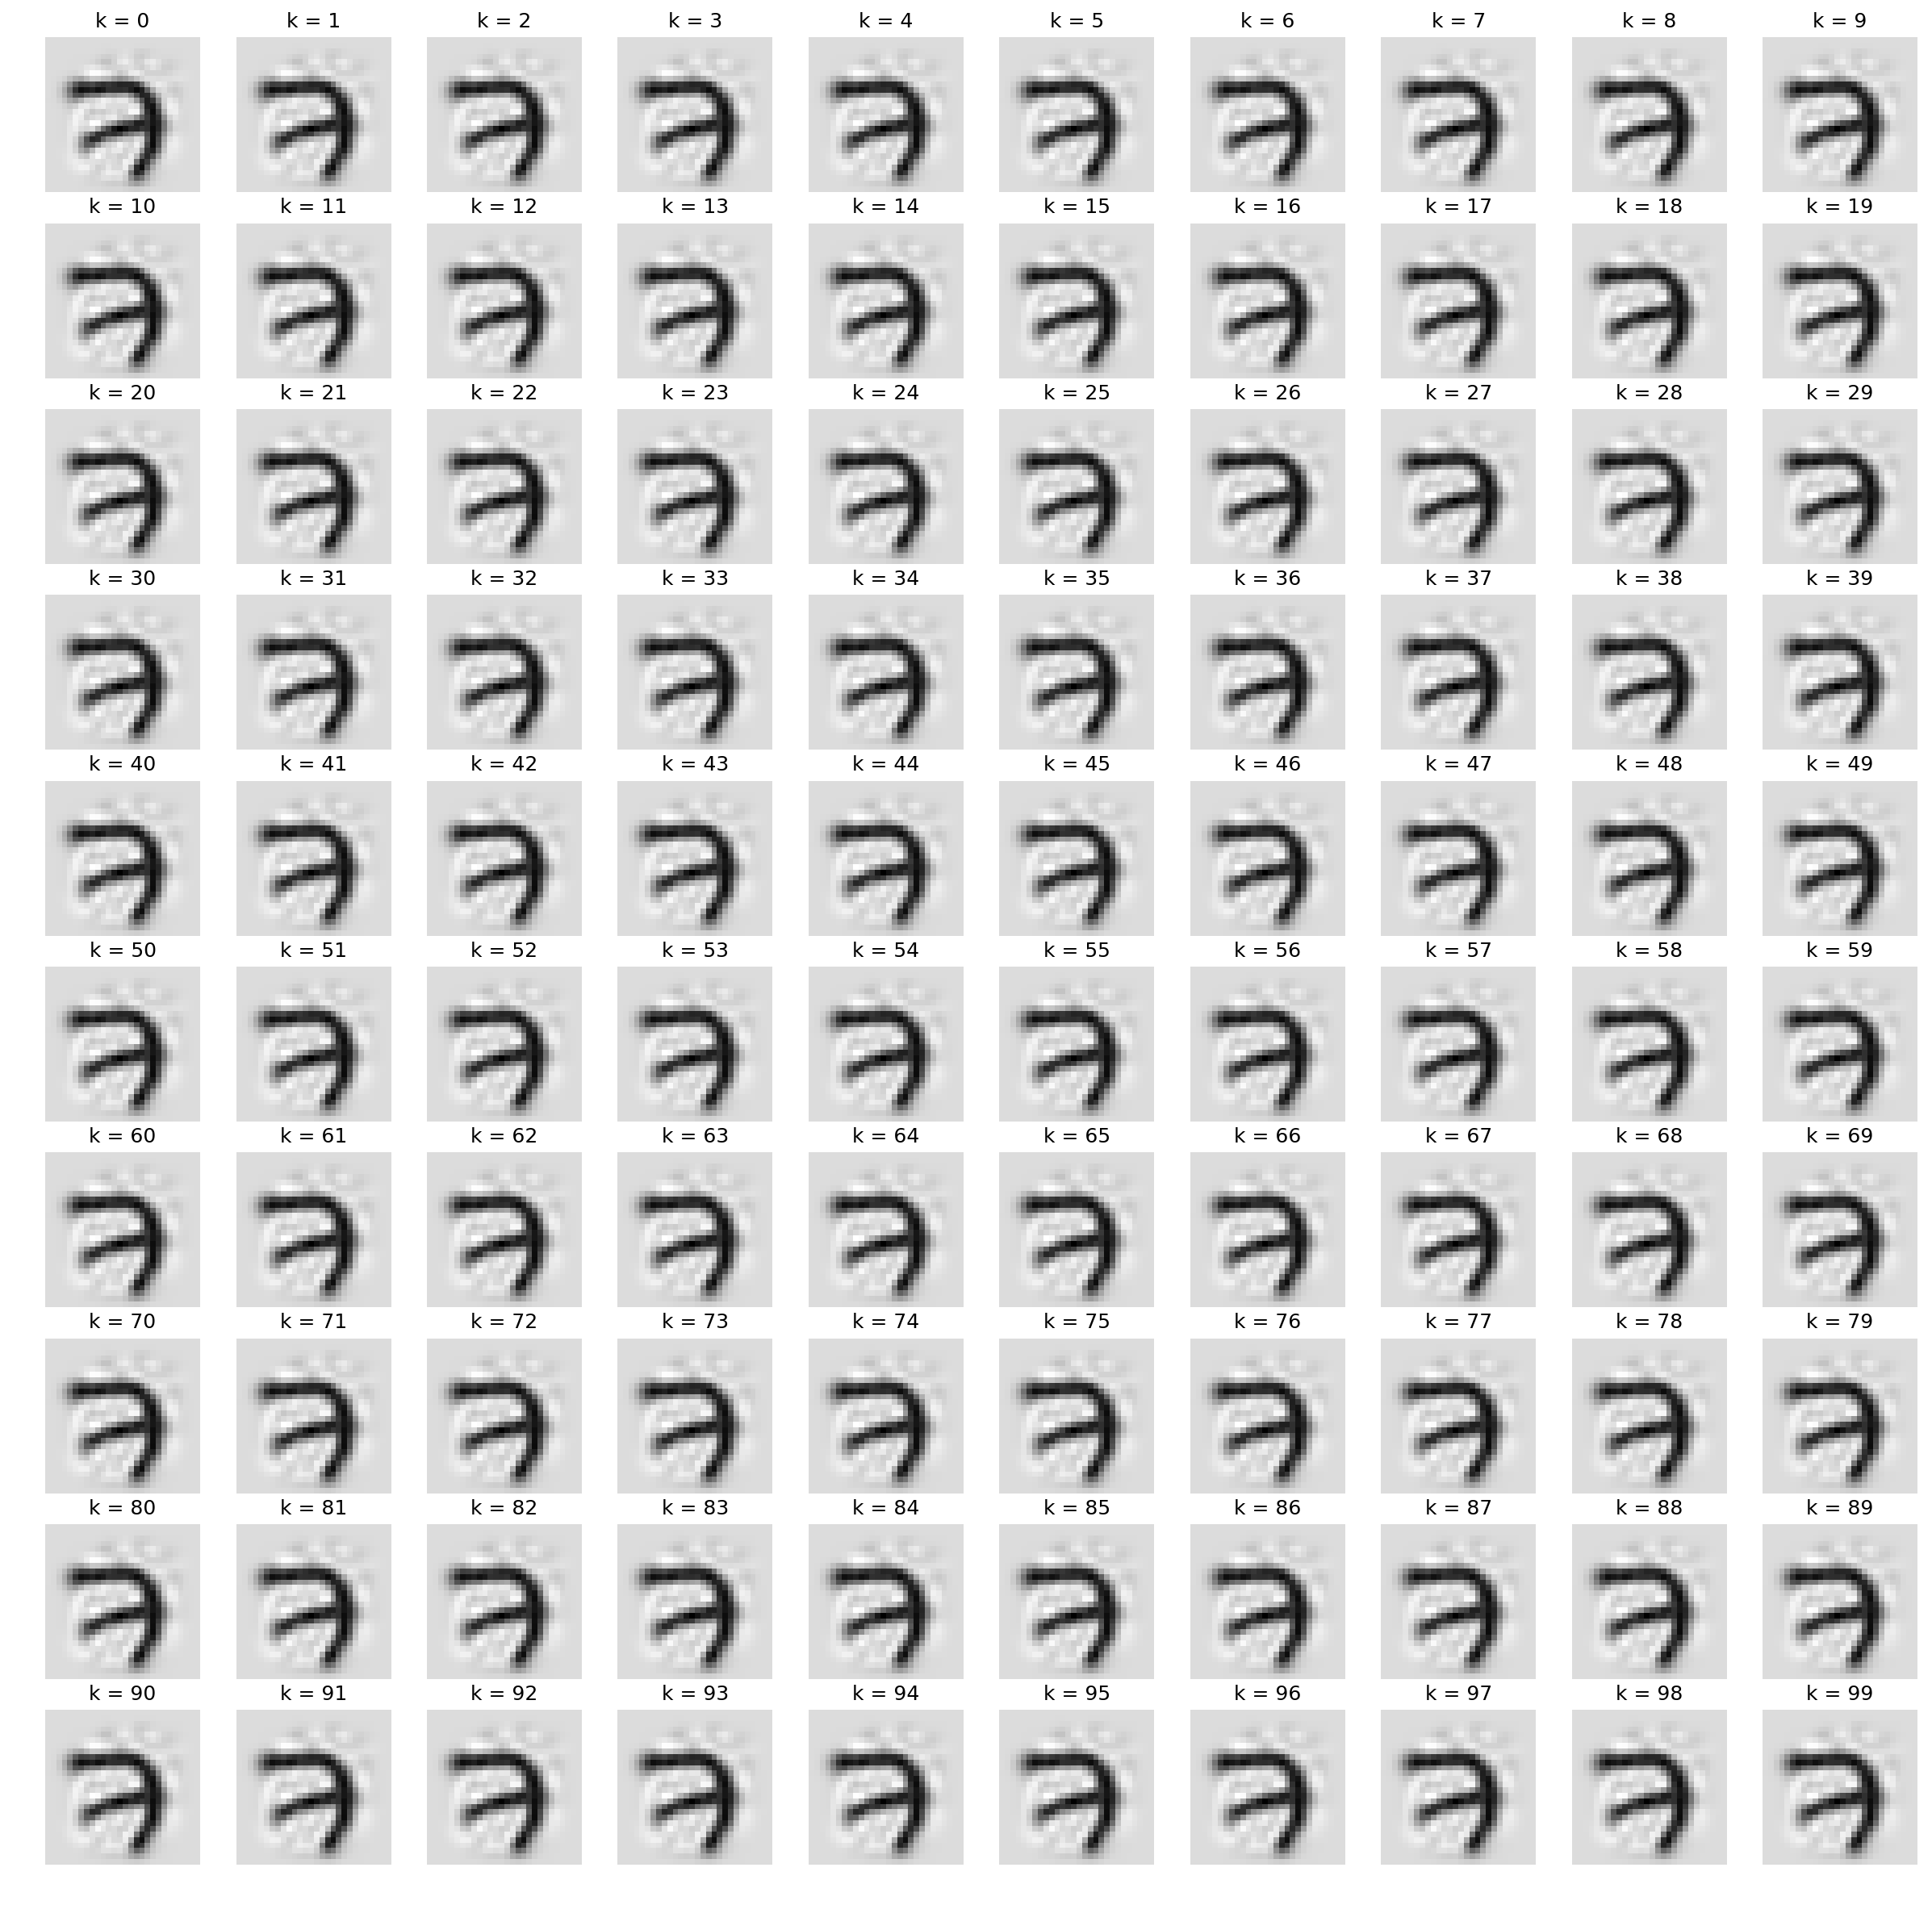

In [17]:
fig, axes = plt.subplots(nrows=n//10, ncols=10, figsize=(20, 20), dpi=150)
X_i=X_i.reshape(-1,784)
for i in range(n):
    img=X_i[i,:].reshape(28,28)
    axes[i//10, i%10].imshow( img.reshape(28,28),cmap='gray_r' )
    axes[i//10, i%10].set_title('k = ' + str(i))
    axes[i//10, i%10].axis('off')
plt.show()